# TITANIC DATASET

Predicting the number of people who survived

# IMPORTING THE REQUIRED LIBRARIES 

In [253]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

# READING THE DATA FROM CSV FILE AND COPYING THE DATA TO PANDAS DATAFRAME

I joined the train and test data so that i can implement my methods on both at once 

In [26]:
train= pd.read_csv("C:\\Users\\bluez\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\bluez\\Downloads\\test.csv")
dataset= pd.concat([train,test],ignore_index=True,axis=0,sort=False)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [152]:
#Setting Uniform Style for graphs
snb.set_style(style="white")
snb.set(rc={'figure.figsize':(12,8),
    'axes.facecolor':'white',
    'axes.grid':True},font_scale=1.5
    )
    


# MISSING VALUES

I am looking for missing values in this dataset. i will be using info function and also heatmap to check out the missing values

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Text(0.5, 1, 'Missing values')

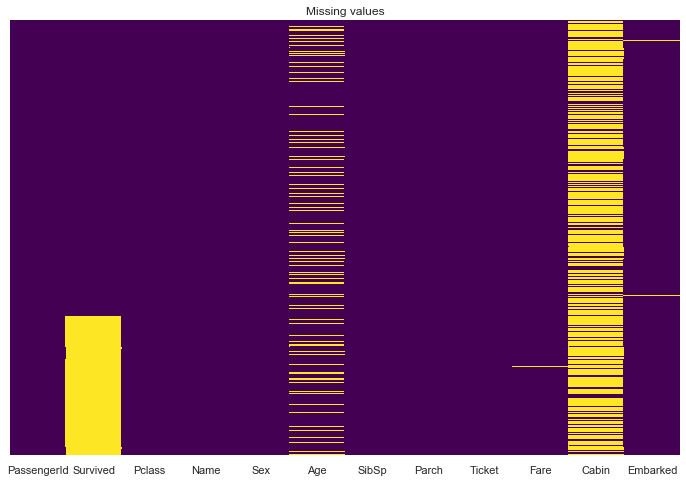

In [121]:
snb.heatmap(data=dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis").set_title("Missing values")

I found that Age column has 236 missing values , Embarked column has 2 missing values and Fare column has 1 missing value, Survived column has few missing values because test dataframe doesnt have Survived column which is the main thing we need to predict, Cabin column has a lot of missing values so it is better to drop this column because i dont think it is okay to impute missing values in this column

# DATA VISUALISATION
I will be visualising only training data

Text(0.5, 1.0, 'Training Data - Percentage of people survived and Deceased')

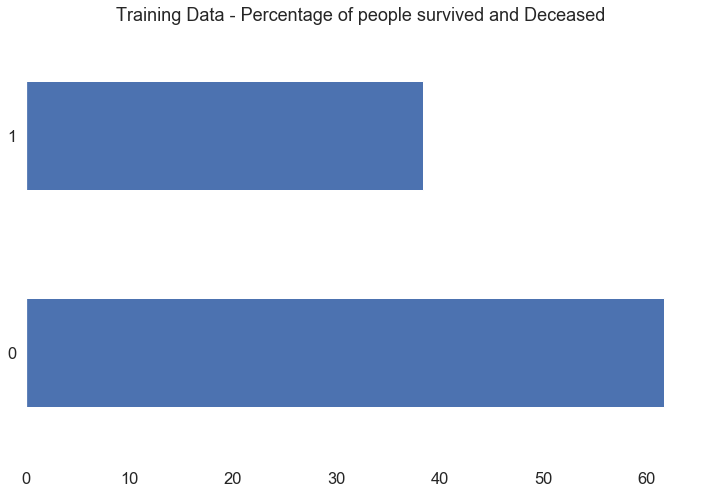

In [190]:
#Survived
(train.Survived.value_counts(normalize=True)*100).plot.barh().set_title("Training Data - Percentage of people survived and Deceased")


This graph shows around 61% passengers died in Titanic

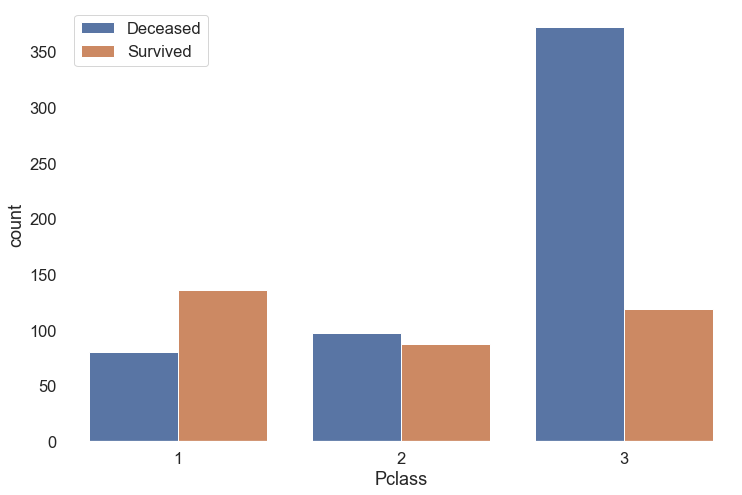

In [191]:
#PClass
snb.countplot(data=train,x="Pclass",hue="Survived").legend(labels=["Deceased","Survived"])

This graph shows the passengers of 3rd Class died the most but they are the one who aborded the most

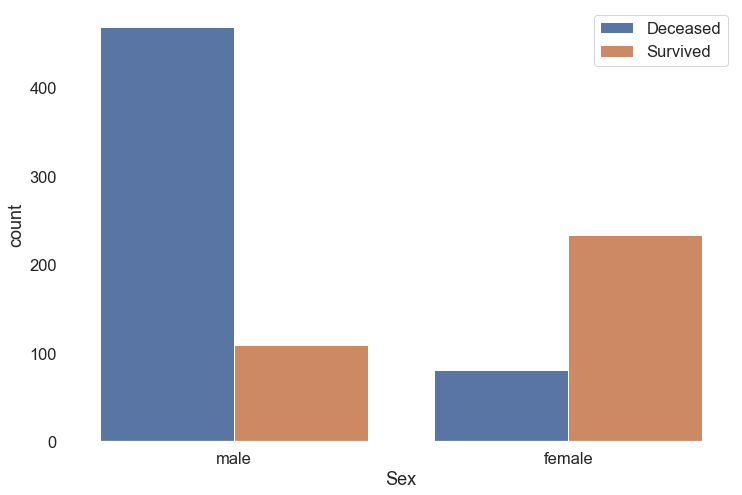

In [192]:
#Gender
snb.countplot(data=train,x="Sex",hue="Survived").legend(labels=["Deceased","Survived"])

As you can see from this graph very less number of males survived whereas very less number of female died

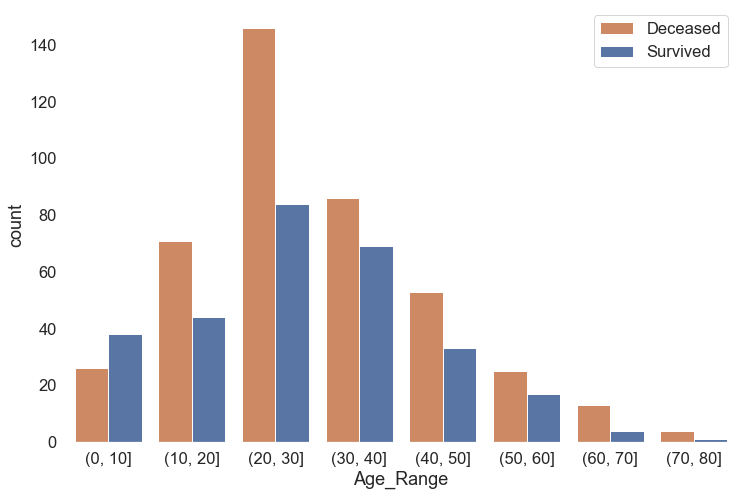

In [166]:
#Age
dataset['Age_Range'] = pd.cut(x=dataset.Age, bins=[0, 10, 20, 30, 40, 50, 60,70,80])
snb.countplot(x = "Age_Range", hue = "Survived", data = dataset, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])


As u can see the youngest passenger onboard was few months old and the oldest was 80years old. We can see that people of age 0-10 saved more than died and people of age 20-30 died the most than saved. We used cut function of pandas through which we created ranges of different ages and we included this in our original dataframe so we need to drop this , we will drop this later.

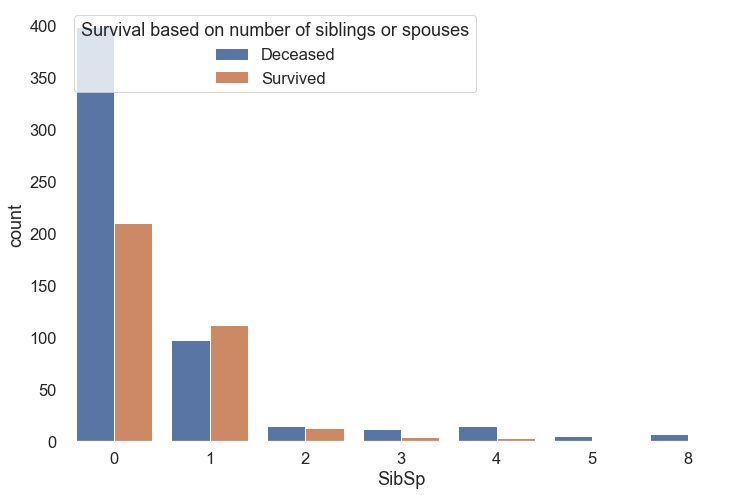

In [193]:
#Siblings or Spouses
x = snb.countplot(x = "SibSp", hue = "Survived", data = train).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on number of siblings or spouses")

SibSp means Siblings or Spouse of a person onboard. You can clearly see the maximum number of siblings and spouses traveled along with one tourist is 8 and that person died. A majority of people travelled alone and next majority they travelled with 1 sibling or spouse its probably spouse.

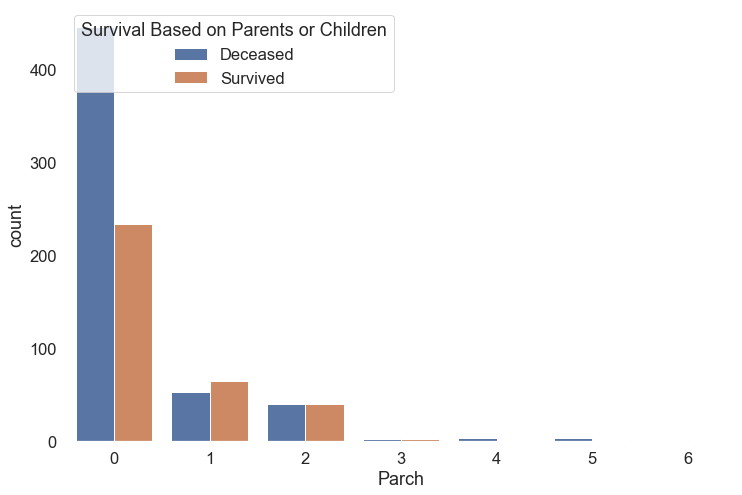

In [194]:
#Parents or Childrens
x=snb.countplot(x="Parch",data=train,hue="Survived").legend(labels=["Deceased","Survived"])
x.set_title("Survival Based on Parents or Children")

We can clearly see from this graph the people who travelled alone survived the most and in the SibSp graph also we saw the same thing, so this is this the highlighting point, so we will create another column for people who are travelling alone

In [195]:
dataset["Family"]=dataset["SibSp"]+dataset["Parch"]
dataset["Travelling_Alone"]=(dataset["Family"]==0)

In [205]:
dataset['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

We checked the Fare column description so that we can segregate the Fare on the basis of percentile

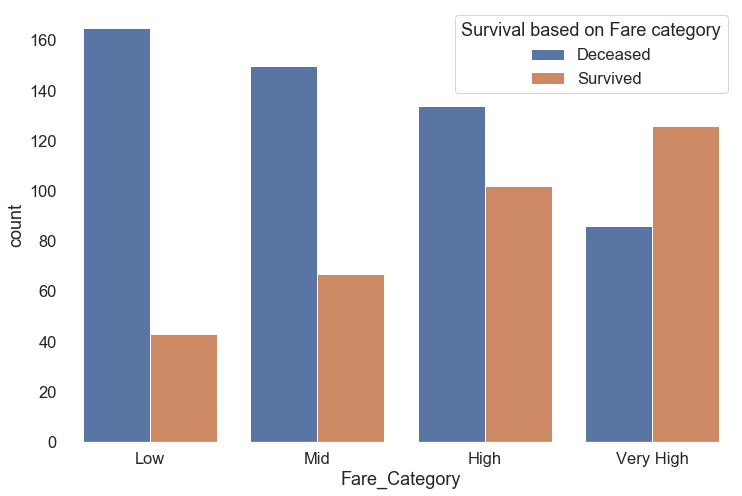

In [217]:
#Fare
dataset["Fare_Category"]=pd.cut(x=dataset.Fare,bins=[0,7.90,14.45,31.28,512],labels=["Low","Mid","High","Very High"])
x = snb.countplot(x = "Fare_Category", hue = "Survived", data = dataset).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on Fare category")

As you can see from the above graph the person who paid the highest money for aboarding the Titanic is the person whose chance is highest for the survival

[Text(0, 0, 'Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

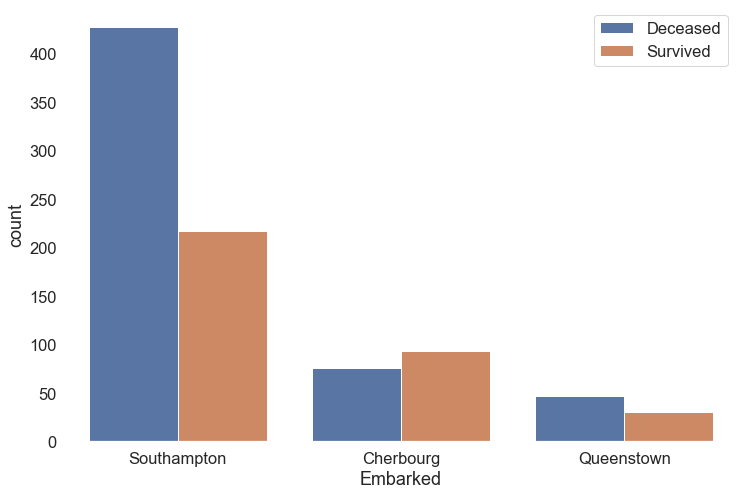

In [228]:
#Embarked
x=snb.countplot(x="Embarked",data=train,hue="Survived")
x.legend(labels=["Deceased","Survived"])
x.set_xticklabels(["Southampton","Cherbourg","Queenstown"])


Majority of people aboarded from Southampton but they are the one who died the most and people aboarded from Cherbourg survived more than died

# Data Imputation

In [234]:
#Filling the missing value in Embarked Column
dataset['Embarked'].fillna(dataset.Embarked.mode()[0],inplace=True)

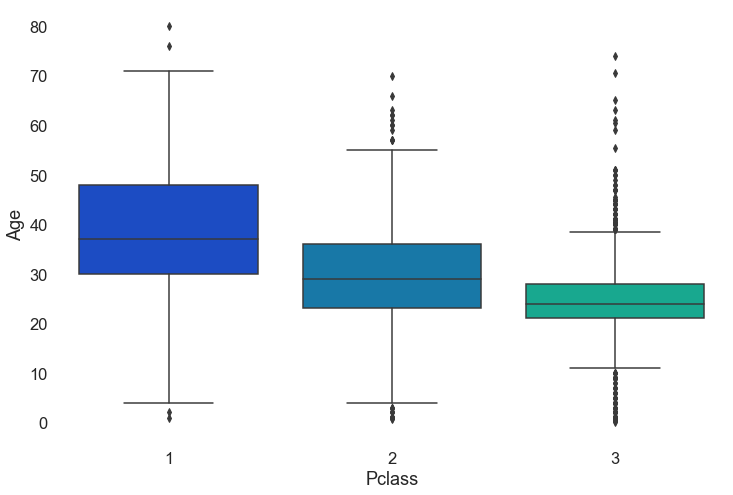

In [240]:
#Age
snb.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age. So we created a function to impute age according to the Pclass of the people

In [236]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [237]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId         1309 non-null int64
Survived            891 non-null float64
Pclass              1309 non-null int64
Name                1309 non-null object
Sex                 1309 non-null object
Age                 1309 non-null float64
SibSp               1309 non-null int64
Parch               1309 non-null int64
Ticket              1309 non-null object
Fare                1308 non-null float64
Cabin               295 non-null object
Embarked            1309 non-null object
Age_Range           1046 non-null category
Family              1309 non-null int64
Travelling_Alone    1309 non-null bool
Fare_Category       1287 non-null category
dtypes: bool(1), category(2), float64(3), int64(5), object(5)
memory usage: 137.5+ KB


# Encoding Columns

In [247]:
#dataset=pd.concat(dataset,pd.get_dummies(dataset.Cabin),axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset.Age_Range)],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset.Embarked, drop_first = True)],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset.Fare_Category, drop_first = True)],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset.Pclass,drop_first = True)], axis=1)
dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])
dataset['Travelling_Alone'] = LabelEncoder().fit_transform(dataset['Travelling_Alone'])

# Dropping Columns

In [248]:
dataset.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name', 'Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)


# Sorting Data Which Needs To Be Predicted And Performing Train Test Split

In [252]:
#Data which needs to be predicted
X_to_be_predicted=dataset[dataset.Survived.isnull()]
X_to_be_predicted=X_to_be_predicted.drop(["Survived"],axis=1)

#Training Data
training_data=dataset
training_data=training_data.dropna()
feature_column=training_data["Survived"]
label_data=training_data.drop(["Survived"],axis=1)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(label_data,feature_column, test_size=0.30)

# Predictions Using Random Forest Classifier

In [255]:
#Random Forest
rfc=RandomForestClassifier(n_estimators=700)
rfc.fit(X_train,y_train)
print("RF Accuracy: "+repr(round(rfc.score(X_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(rfc,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))

RF Accuracy: 76.87%
The cross validated score for Random forest is: 80.89


# Saving Data 

In [257]:
result = rfc.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0


In [260]:
filename="Submission.csv"
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Submission.csv
